In [65]:
import csv
import numpy as np
import pandas as pd
import glob
import pickle

In [66]:
from pylab import *

In [67]:
%matplotlib inline

In [101]:
pd.set_option('display.max_rows', 100000000)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

path = ["/home/petr/datainc/2013", "/home/petr/datainc/2014", "/home/petr/datainc/data_2015",
  "/home/petr/datainc/data_Q1_2016", "/home/petr/datainc/data_Q2_2016",
  "/home/petr/datainc/data_Q3_2016", "/home/petr/datainc/data_Q4_2016",
  "/home/petr/datainc/data_Q1_2017", "/home/petr/datainc/data_Q2_2017"]
path = ["/home/petr/datainc/2013"]
allFiles = []
for path_ in path:
  allFiles += glob.glob(path_ + "/*.csv")
  
allFiles.sort()

for i, fn in enumerate(allFiles):
  allFiles[i] = [fn, (int(fn[-14:-10])-2013)*12 + int(fn[-9:-7])- 4]


In [106]:
failures_and_total = [[0.,0.] for i in range(max([x[1] for x in allFiles])+1)]

for file_ in allFiles:
  df = pd.read_csv(file_[0], index_col=None, header=0,usecols=["failure"])
  failures_count = len(df[df["failure"]==1])
  total_count = len(df)
  failures_and_total[file_[1]][0] += failures_count
  failures_and_total[file_[1]][1] += total_count

print failures_and_total

pickle_out = open("failures_and_total.pickle","wb")
pickle.dump(failures_and_total, pickle_out)
pickle_out.close()


[[45.0, 452821.0], [123.0, 687503.0], [81.0, 679860.0], [110.0, 723411.0], [49.0, 460663.0], [4.0, 25200.0], [69.0, 441807.0], [124.0, 788120.0], [135.0, 832116.0]]


In [112]:
pickle_in = open("failures_and_total.pickle","rb")
failures_and_total = pickle.load(pickle_in)
failures_fraction = [x[0]/x[1] for x in failures_and_total]


[[45.0, 452821.0], [123.0, 687503.0], [81.0, 679860.0], [110.0, 723411.0], [49.0, 460663.0], [4.0, 25200.0], [69.0, 441807.0], [124.0, 788120.0], [135.0, 832116.0]]
[9.937701652529366e-05, 0.00017890831021828268, 0.00011914217633042097, 0.00015205740581771636, 0.00010636842985002051, 0.00015873015873015873, 0.00015617679212868969, 0.00015733644622646298, 0.0001622369958034697]


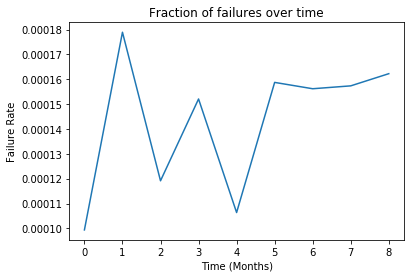

In [113]:
plt.xlabel("Time (Months)")
plt.ylabel("Failure Rate")
plt.title("Fraction of failures over time")
plt.plot(failures_fraction)
plt.show()